In [6]:
# Libraries and versions 
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
%matplotlib inline
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
%pylab inline
#larger visuals
pylab.rcParams['figure.figsize'] = (10, 6)

Python: 2.7.11 | 64-bit | (default, Jun 11 2016, 03:41:56) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
scipy: 0.17.1
numpy: 1.10.4
matplotlib: 1.5.1
pandas: 0.18.0
sklearn: 0.17
Populating the interactive namespace from numpy and matplotlib


In [38]:
import urllib2
#url = "http://www.cs.duke.edu/courses/fall16/compsci101/data/earthquakeSmall.txt" #small test file 
url = 'http://www.cs.duke.edu/courses/fall16/compsci101/data/earthquakeDataNov1-2016past30days.txt' #large real file
source = urllib2.urlopen(url)
data = [str(line.strip()[1:]) for line in source]


In [40]:
bases = []
dict1 = {}
for eq in data: 
    if "," in eq: 
        loc = str(eq[eq.find(",") + 1:])
    else: 
        loc = str(eq[6:])
    bases.append(loc.strip())
uniquebases = set(bases)
print
print "First Ten Unique Locations:", list(uniquebases)[:10]


First Ten Unique Locations: ['Canada', 'East Timor', 'Turkmenistan', 'Wyoming', 'Balleny Islands region', 'Argentina', 'Bolivia', 'Texas', 'Northern Mid-Atlantic Ridge', 'Kansas']


In [42]:
#Counter Function
dict1 = {}
for base in bases: 
    if base not in dict1:
        dict1[base] = 0
    dict1[base] += 1


In [44]:
x = dict1.keys()
y = dict1.values()
print x[:10]
print y[:10]

['Canada', 'East Timor', 'Turkmenistan', 'Wyoming', 'Balleny Islands region', 'Argentina', 'Bolivia', 'Texas', 'Northern Mid-Atlantic Ridge', 'Kansas']
[103, 4, 1, 73, 1, 15, 1, 2, 3, 32]


In [46]:
#horizontal dataframe
myarray = numpy.array([array(y)])
mydataframe = pandas.DataFrame(myarray, columns = array(x))
mydataframe

,Canada,East Timor,Turkmenistan,Wyoming,Balleny Islands region,Argentina,Bolivia,Texas,Northern Mid-Atlantic Ridge,Kansas,...,Poland,Hawaii,Macedonia,Guadeloupe,Burma,Mexico,Antarctica,Tennessee,Greece,Croatia
0,103,4,1,73,1,15,1,2,3,32,...,1,252,1,2,2,10,1,18,29,1


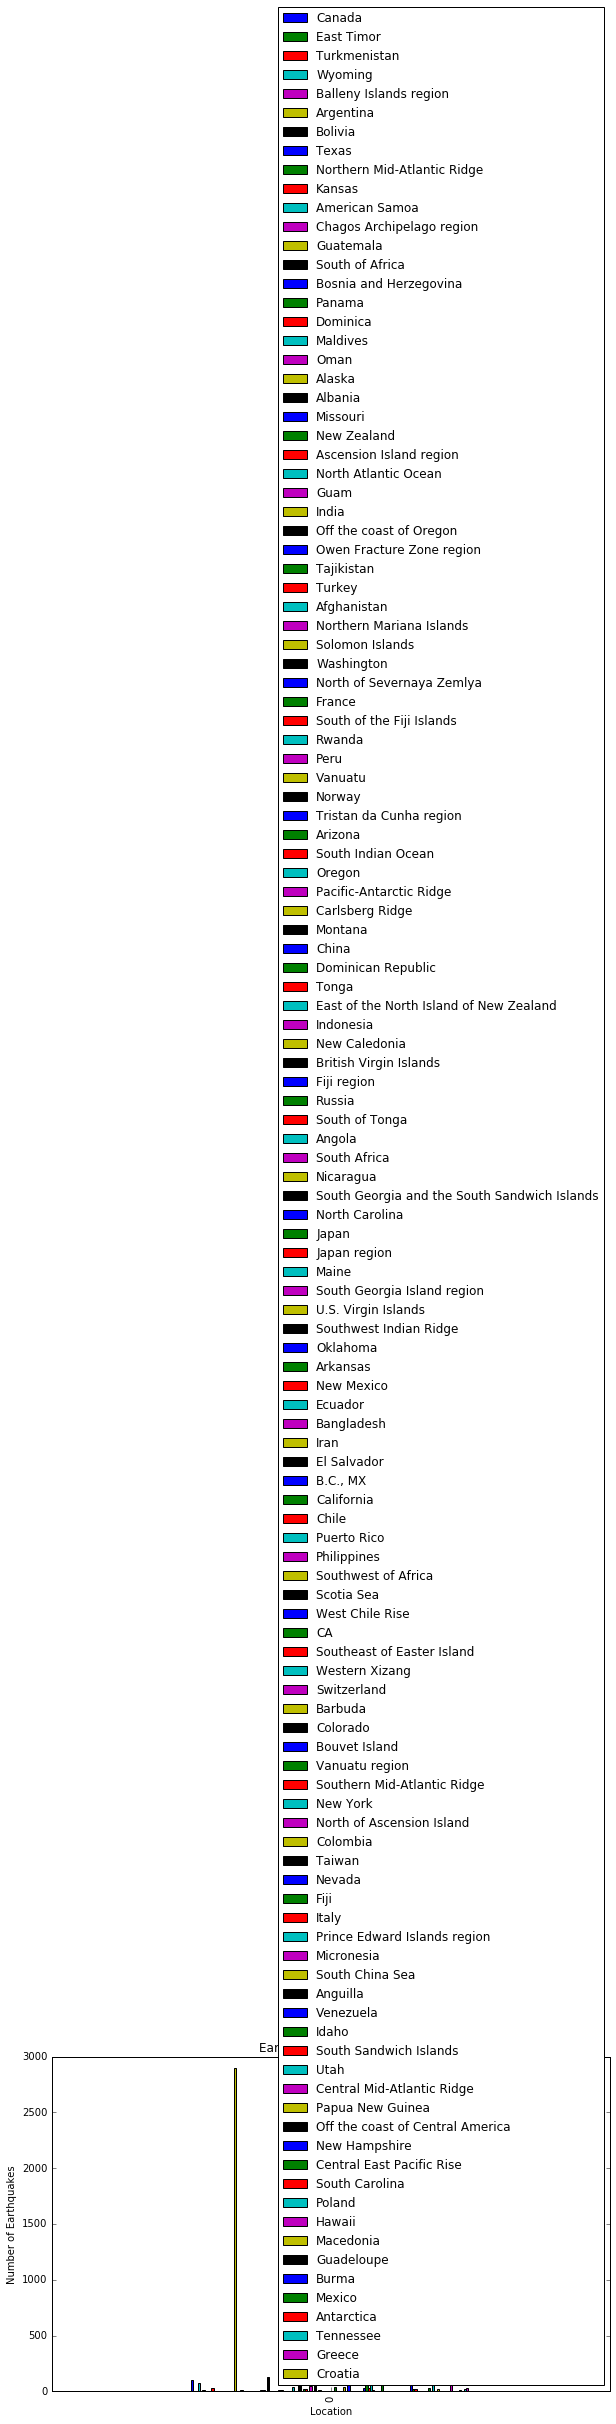

In [49]:
my_plot = mydataframe.plot(kind='bar',legend='Number',title="Earthquakes in October")
my_plot.set_xlabel("Location")
my_plot.set_ylabel("Number of Earthquakes")

In [50]:
countries = dict1.keys()
counts  =  dict1.values()
df = pandas.DataFrame({'country_name' : pandas.Series(countries),
                       'earthquake_count' : pandas.Series(counts)})

In [51]:
df.head() #first 5 values 

,country_name,earthquake_count
0,Canada,103
1,East Timor,4
2,Turkmenistan,1
3,Wyoming,73
4,Balleny Islands region,1


In [53]:
df.tail() #last 5 values

,country_name,earthquake_count
120,Mexico,10
121,Antarctica,1
122,Tennessee,18
123,Greece,29
124,Croatia,1


In [54]:
df.dtypes

country_name        object
earthquake_count     int64
dtype: object

In [55]:
df.describe()
# easily see here that the maximum number of earthquakes in any given location was 12

,earthquake_count
count,125.000000
mean,65.552000
std,319.012829
min,1.000000
25%,1.000000
50%,3.000000
75%,14.000000
max,2895.000000
